# Logistic Regression from a Neural Networks Perspective

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Sigmoid Activation Function

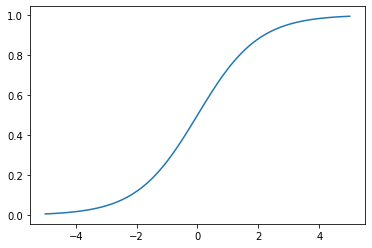

In [2]:
x = np.linspace(-5, 5, 100)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

s = sigmoid(x)
plt.plot(x, s)

## Cross-entropy Loss Function

In [3]:
x = np.linspace(0, 1, 100)
Ly1 = - np.log(x) # Loss if the true y is 1

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


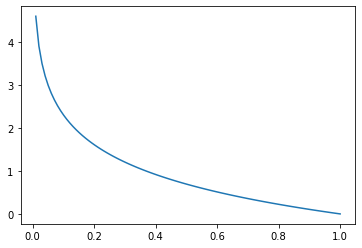

In [4]:
plt.plot(x, Ly1)

In [5]:
Ly0 = - np.log(1-x) # Loss if the true y is 0

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


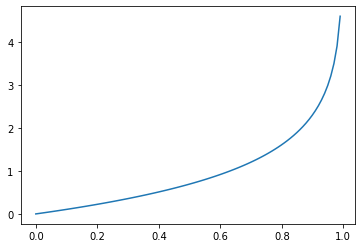

In [6]:
plt.plot(x, Ly0)

# Logistic Regression

## Prepare Data

In [7]:
import pandas as pd
import math

In [8]:
data = 'data/iris.csv'

In [9]:
df = pd.read_csv(data)

In [10]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df['Name'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
df = pd.get_dummies(df, columns=['Name'])

In [13]:
df.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name_Iris-setosa,Name_Iris-versicolor,Name_Iris-virginica
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1
149,5.9,3.0,5.1,1.8,0,0,1


## Generate Training and Test sets

In [14]:
test_indices = np.random.choice(150, 30, replace=False)

In [15]:
all_indices = np.arange(150)

In [16]:
train_indices = np.setdiff1d(all_indices, test_indices)

In [17]:
train_set_x = df.loc[train_indices, ('SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth')].to_numpy().T

In [18]:
train_set_y = df.loc[train_indices, ('Name_Iris-setosa', 'Name_Iris-versicolor', 'Name_Iris-virginica')].to_numpy().T

In [19]:
test_set_x = df.loc[test_indices, ('SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth')].to_numpy().T

In [20]:
test_set_y = df.loc[test_indices, ('Name_Iris-setosa', 'Name_Iris-versicolor', 'Name_Iris-virginica')].to_numpy().T

In [21]:
def initialize_parameters(dim):
    w = np.random.randn(dim, 1)
    b = 0.
    return w, b

In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [23]:
def propagate(w, b, X, y):
    m = X.shape[1]
    
    # Calculate a
    z = np.dot(w.T, X) + b
    a = sigmoid(z)
    
    cost = - 1/m * np.sum(y * np.log(a) + (1-y) * np.log(1-a))
    
    # Calculate dw, db
    dw = 1/m * np.dot(X, (a - y).T)
    db = 1/m * np.sum(a - y)
    
    cost = np.squeeze(cost)
    
    grads = {'dw': dw,
            'db': db}
    
    return grads, cost
    

In [24]:
def optimize(w, b, X, y, num_iter, learning_rate):
    costs = []
    
    for i in range(num_iter):
        grads, cost = propagate(w, b, X, y)
        
        w = w - learning_rate * grads['dw']
        b = b - learning_rate * grads['db']
        
        if i % 100 == 0:
            costs.append(cost)
            
    params = {'w': w,
             'b': b}
    
    return params, grads, costs

In [25]:
def predict(w, b, X):
    a = sigmoid(np.dot(w.T, X) + b)
    a[a>=0.5] = 1.
    a[a<0.5] = 0.
    return a

In [26]:
def model(x_train, y_train, x_test, y_test, num_iter, learning_rate):
    n = x_train.shape[0]
    w, b = initialize_parameters(n)
    params, grads, costs = optimize(w, b, x_train, y_train, num_iter, learning_rate)
    
    y_hat_train = predict(params['w'], params['b'], x_train)
    y_hat_test = predict(params['w'], params['b'], x_test)
    
    print('training error: ', np.mean(np.abs(y_hat_train - y_train)))
    print('test error: ', np.mean(np.abs(y_hat_test- y_test)))
    
    return params, costs
    

In [27]:
train_set_y.shape

(3, 120)

In [28]:
params, costs = model(train_set_x, train_set_y[1,:].reshape(1, -1), test_set_x, test_set_y[1,:].reshape(1, -1), 4000, 0.03)

training error:  0.25833333333333336
test error:  0.3333333333333333


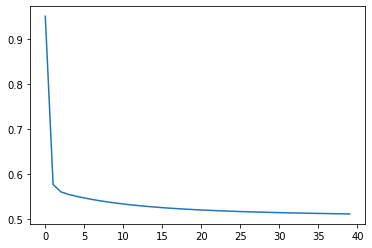

In [29]:
plt.plot(costs)

In [30]:
params, costs = model(train_set_x, train_set_y[2,:].reshape(1, -1), test_set_x, test_set_y[2,:].reshape(1, -1), 4000, 0.03)

training error:  0.025
test error:  0.03333333333333333


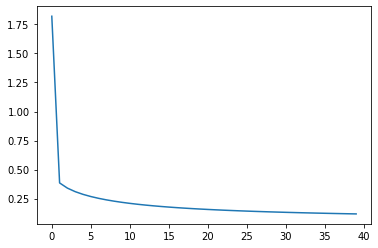

In [31]:
plt.plot(costs)

In [32]:
params, costs = model(train_set_x, train_set_y[0,:].reshape(1, -1), test_set_x, test_set_y[0,:].reshape(1, -1), 4000, 0.03)

training error:  0.0
test error:  0.0


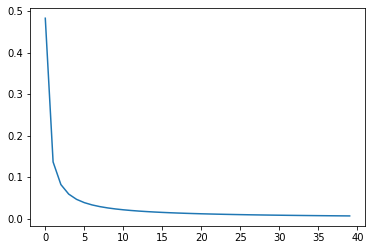

In [33]:
plt.plot(costs)

In [34]:
params, costs = model(train_set_x, train_set_y[1,:].reshape(1, -1), test_set_x, test_set_y[1,:].reshape(1, -1), 4000, 0.03)

training error:  0.2916666666666667
test error:  0.3333333333333333
